## Data Pre-Processing

In [1]:
#import libraries, read in data to pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

comments = pd.read_csv('UScomments.csv', error_bad_lines=False)
comments.head()

/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/4275356007.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv('UScomments.csv', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/4275356007.py:7: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', error_bad_lines=False)


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
#checking for null values
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
#dropping nulls
comments.dropna(inplace=True)

## Inital Sentiment Analysis

In [7]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.1 MB/s eta 0:00:0000:0100:01


In [8]:
from textblob import TextBlob

In [10]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [12]:
df=comments[0:10000]

In [11]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [13]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [14]:
comments['polarity']=polarity

In [16]:
comments.head(15)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000

## WordCloud Representation of Sentiments

In [18]:
comments_positive = comments[comments['polarity']==1]

In [19]:
comments_negative = comments[comments['polarity']==-1]

In [20]:
comments_negative.head(2)

video_id                                       comment_text likes  \
512  8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562  8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   

    replies  polarity  
512       0      -1.0  
562       0      -1.0

In [21]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00a 0:00:01


In [22]:
from wordcloud import WordCloud ,  STOPWORDS

In [23]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [24]:
total_comments=' '.join(comments_negative['comment_text'])

In [25]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

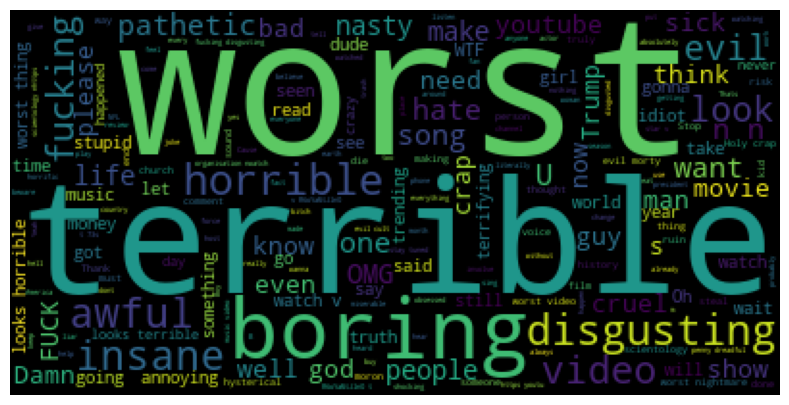

In [26]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [27]:
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

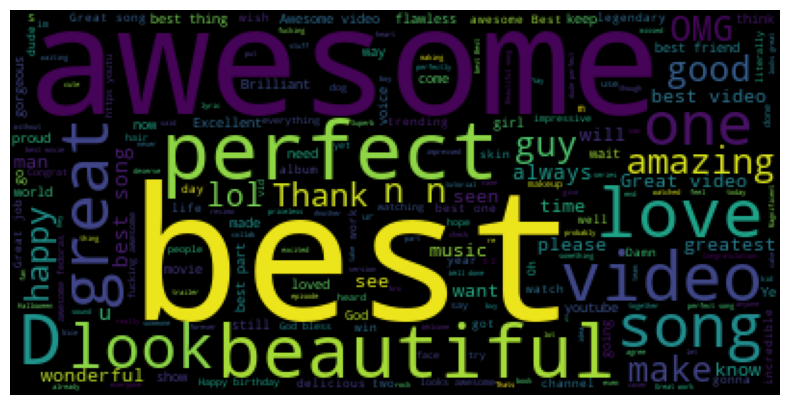

In [28]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Emoji Analysis

In [29]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=29949355f8fc9f5456b1d8d39fccf1c48bf7e068e812e1a125d74b38cd8c9812
  Stored in directory: /Users/vincenttermini/Library/Caches/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [35]:
import emoji

In [31]:
comments.head(14)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000

In [33]:
sample_comment = 'trending 😉'
sample_comment

'trending 😉'

In [37]:
[c for c in sample_comment if c in emoji.EMOJI_DATA]

['😉']

In [40]:
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [41]:
len(emoji_list)

294549

In [42]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [43]:
from collections import Counter

In [45]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [47]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [48]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [49]:
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [50]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [51]:
!pip install plotly

In [52]:
import plotly.graph_objs as go

In [53]:
from plotly.offline import iplot

In [54]:
trace=go.Bar(x=emojis,y=freqs)

In [56]:
iplot([trace])

## Collecting Entirety of Youtube Data

In [57]:
import os

In [60]:
path='/Users/vincenttermini/Downloads/additional_data'

In [62]:
files=os.listdir(path)
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [74]:
files_list = np.array(files)
indices = [1, 5, 7, 8, 10, 11, 13, 14, 18, 19]
files_csv = files_list[indices]

In [75]:
print(files_csv)

['MXvideos.csv' 'INvideos.csv' 'DEvideos.csv' 'JPvideos.csv'
 'KRvideos.csv' 'CAvideos.csv' 'RUvideos.csv' 'FRvideos.csv'
 'USvideos.csv' 'GBvideos.csv']


In [76]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])


/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/1597861774.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/1597861774.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/1597861774.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/1597861774.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/1597861774.py:4: FutureWarning:

The error_

In [77]:
full_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Disfruta la presencia del Chef Torreblanca en ...      MX  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...      MX  
2  La canciÃ³n del principio se llama âEste esp...      MX  
3  El video es de un Walmart en el pais centroame...      MX  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...      MX

In [79]:
full_df.shape

(375942, 17)

## Which categories get the most likes?

In [81]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [83]:
cat=pd.read_csv('category_file.csv')
cat

category_id        category_columns
0             1        Film & Animation
1             2        Autos & Vehicles
2            10                   Music
3            15          Pets & Animals
4            17                  Sports
5            18            Short Movies
6            19         Travel & Events
7            20                  Gaming
8            21           Videoblogging
9            22          People & Blogs
10           23                  Comedy
11           24           Entertainment
12           25         News & Politics
13           26           Howto & Style
14           27               Education
15           28    Science & Technology
16           29   Nonprofits & Activism
17           30                  Movies
18           31         Anime/Animation
19           32        Action/Adventure
20           33                Classics
21           34                  Comedy
22           35             Documentary
23           36                   Drama
24           37                  Family
25           38                 Foreign
26           39                  Horror
27           40          Sci-Fi/Fantasy
28           41                Thriller
29           42                  Shorts
30           43                   Shows
31           44    Trailers

In [91]:
cat = cat.rename(columns={'category_columns': 'category_name'})
cat

category_id           category_name
0             1        Film & Animation
1             2        Autos & Vehicles
2            10                   Music
3            15          Pets & Animals
4            17                  Sports
5            18            Short Movies
6            19         Travel & Events
7            20                  Gaming
8            21           Videoblogging
9            22          People & Blogs
10           23                  Comedy
11           24           Entertainment
12           25         News & Politics
13           26           Howto & Style
14           27               Education
15           28    Science & Technology
16           29   Nonprofits & Activism
17           30                  Movies
18           31         Anime/Animation
19           32        Action/Adventure
20           33                Classics
21           34                  Comedy
22           35             Documentary
23           36                   Drama
24           37                  Family
25           38                 Foreign
26           39                  Horror
27           40          Sci-Fi/Fantasy
28           41                Thriller
29           42                  Shorts
30           43                   Shows
31           44    Trailers

In [92]:
cat.set_index('category_id',inplace=True)

In [93]:
cat

category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [95]:
dct = cat.to_dict()

In [96]:
dct['category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [98]:
full_df['category_name']=full_df['category_id'].map(dct['category_name'])

In [99]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [100]:
full_df.head(2)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   

              channel_title  category_id              publish_time  \
0           MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1  Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description country    category_name  
0  Disfruta la presencia del Chef Torreblanca en ...      MX    Entertainment  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...      MX   People & Blogs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' People & Blogs'),
  Text(2, 0, ' News & Politics'),
  Text(3, 0, ' Howto & Style'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' Comedy'),
  Text(6, 0, ' Sports'),
  Text(7, 0, ' Autos & Vehicles'),
  Text(8, 0, ' Film & Animation'),
  Text(9, 0, ' Nonprofits & Activism'),
  Text(10, 0, ' Education'),
  Text(11, 0, ' Science & Technology'),
  Text(12, 0, ' Gaming'),
  Text(13, 0, ' Pets & Animals'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

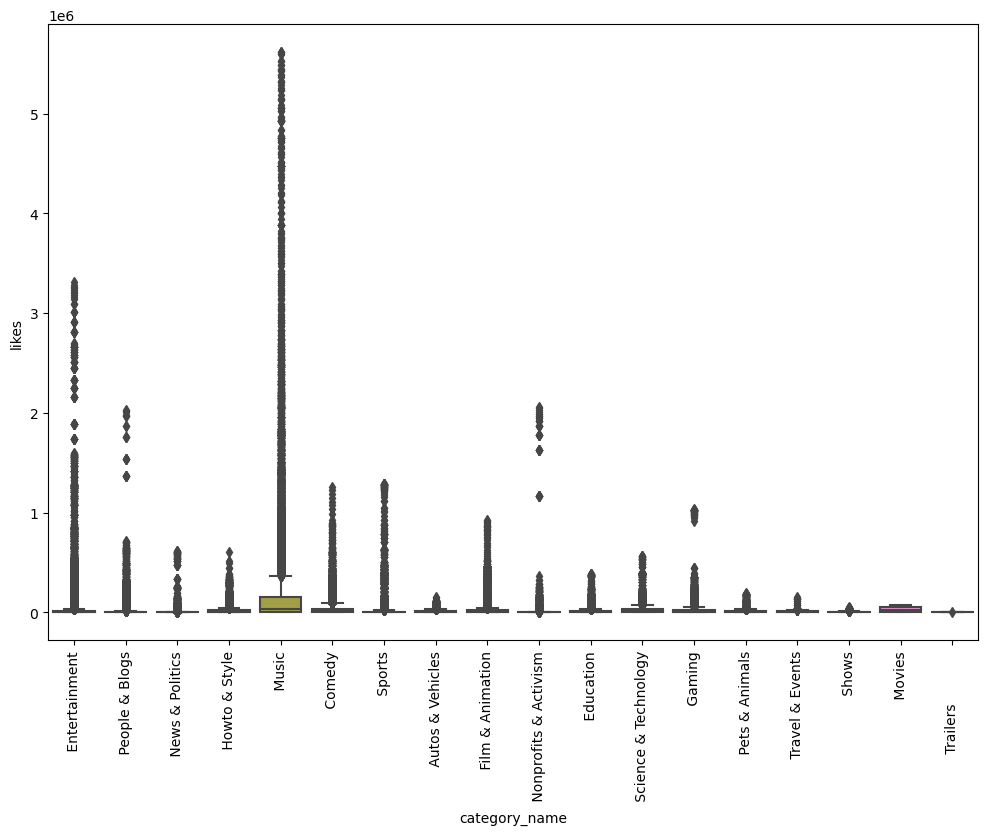

In [103]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

## Is the audience engaged or not?

In [104]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [106]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100
full_df.head(3)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   

   ...                                  thumbnail_link comments_disabled  \
0  ...  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg             False   
1  ...  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg             False   
2  ...  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg             False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   
1             False                   False   
2             False                   False   

                                         description country  \
0  Disfruta la presencia del Chef Torreblanca en ...      MX   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...      MX   
2  La canciÃ³n del principio se llama âEste esp...      MX   

      category_name like_rate  dislike_rate  comment_count_rate  
0     Entertainment  1.348467      0.116403            0.592010  
1    People & Blogs  0.258164      0.165758            0.351522  
2   News & Politics  7.426652      0.195496            0.446114  

[3 rows x 21 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' People & Blogs'),
  Text(2, 0, ' News & Politics'),
  Text(3, 0, ' Howto & Style'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' Comedy'),
  Text(6, 0, ' Sports'),
  Text(7, 0, ' Autos & Vehicles'),
  Text(8, 0, ' Film & Animation'),
  Text(9, 0, ' Nonprofits & Activism'),
  Text(10, 0, ' Education'),
  Text(11, 0, ' Science & Technology'),
  Text(12, 0, ' Gaming'),
  Text(13, 0, ' Pets & Animals'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

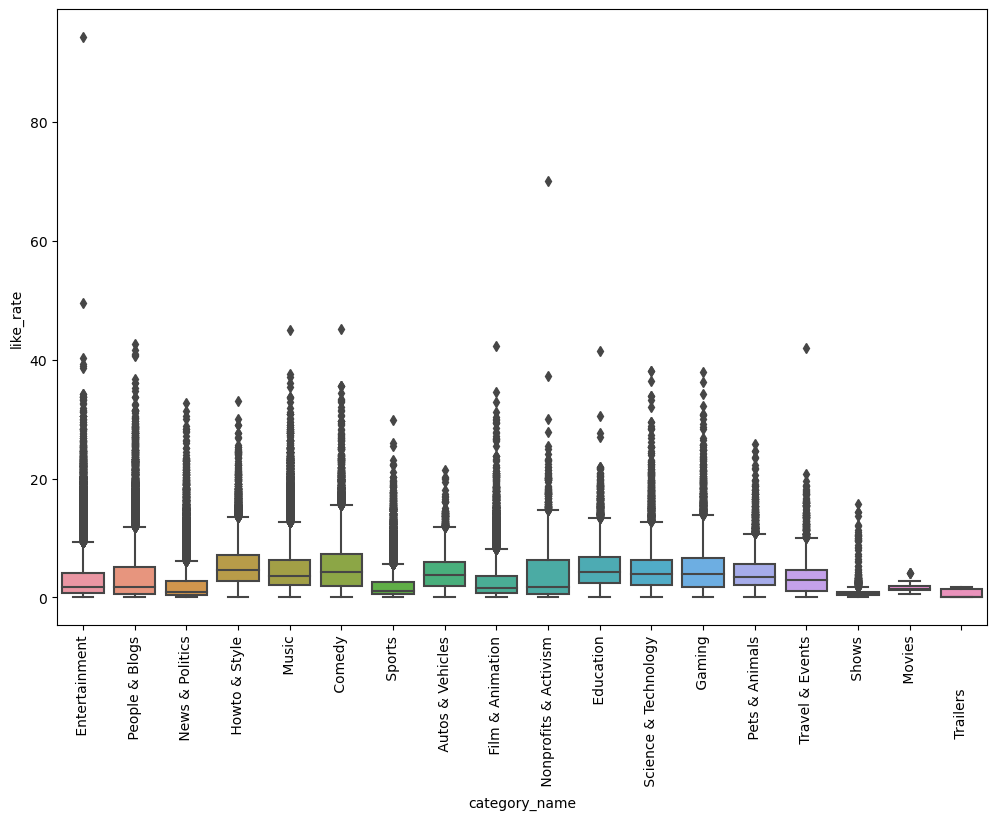

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='views', ylabel='likes'>

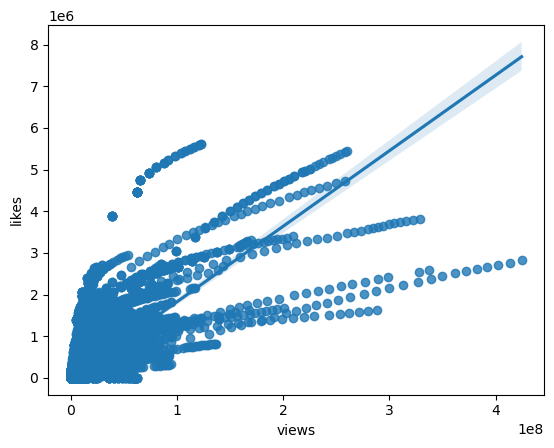

In [110]:
sns.regplot(data=full_df,x='views',y='likes')

<AxesSubplot:>

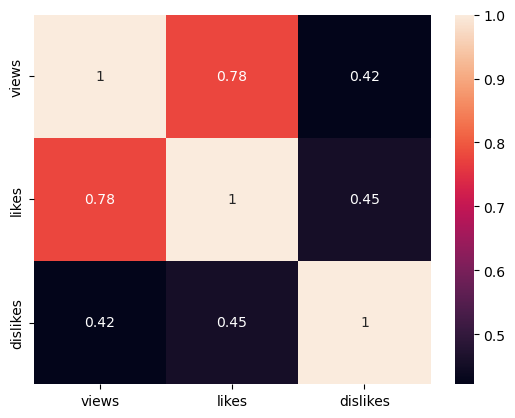

In [114]:
sns.heatmap(data=full_df[['views','likes','dislikes']].corr(),annot=True)

## Analyzing Trending Videos

In [115]:
full_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   ...                                  thumbnail_link comments_disabled  \
0  ...  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg             False   
1  ...  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg             False   
2  ...  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg             False   
3  ...  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg             False   
4  ...  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg             False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   
1             False                   False   
2             False                   False   
3             False                   False   
4             False                   False   

                                         description country  \
0  Disfruta la presencia del Chef Torreblanca en ...      MX   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...      MX   
2  La canciÃ³n del principio se llama âEste esp...      MX   
3  El video es de un Walmart en el pais centroame...      MX   
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...      MX   

      category_name  like_rate  dislike_rate  comment_count_rate  
0     Entertainment   1.348467      0.116403            0.592010  
1    People & Blogs   0.258164      0.165758            0.351522  
2   News & Politics   7.426652      0.195496            0.446114  
3   News & Politics   0.393123      0.177842            0.216322  
4     Howto & Style  11.557009      0.136210            1.485704  

[5 rows x 21 columns]

In [127]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [125]:
import plotly.express as px

In [126]:
px.bar(data_frame=cdf[0:20], x= 'channel_title',y='total_videos')

## Does punctuation impact views, likes, dislikes?

In [128]:
import string

In [130]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [131]:
full_df['title'][0]

0                       CapÃ­tulo 12 | MasterChef 2017
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0             Malika LePen : Femme de Gauche - Trailer
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
0        John Lewis Christmas Ad 2017 - #MozTheMonster
Name: title, dtype: object

In [132]:
text = 'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punc_count(text)

4

In [133]:
sample = full_df[0:10000]
sample['count_punctuation']= sample['title'].apply(punc_count)
sample.head()

/var/folders/9l/fr0znjhd2qgcljk30jyy4n1r0000gn/T/ipykernel_40935/1365887241.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   ...  comments_disabled ratings_disabled  video_error_or_removed  \
0  ...              False            False                   False   
1  ...              False            False                   False   
2  ...              False            False                   False   
3  ...              False            False                   False   
4  ...              False            False                   False   

                                         description  country  \
0  Disfruta la presencia del Chef Torreblanca en ...       MX   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...       MX   
2  La canciÃ³n del principio se llama âEste esp...       MX   
3  El video es de un Walmart en el pais centroame...       MX   
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...       MX   

      category_name  like_rate dislike_rate  comment_count_rate  \
0     Entertainment   1.348467     0.116403            0.592010   
1    People & Blogs   0.258164     0.165758            0.351522   
2   News & Politics   7.426652     0.195496            0.446114   
3   News & Politics   0.393123     0.177842            0.216322   
4     Howto & Style  11.557009     0.136210            1.485704   

   count_punctuation  
0                  1  
1                  3  
2                  1  
3                  1  
4                  1  

[5 rows x 22 columns]

<AxesSubplot:xlabel='count_punctuation', ylabel='views'>

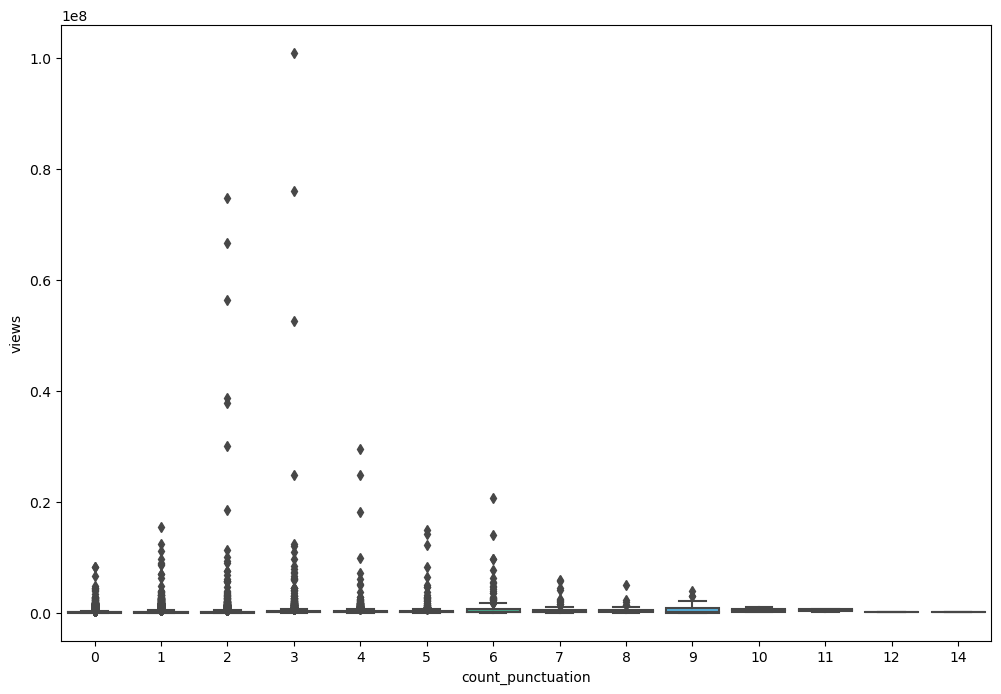

In [136]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sample,x='count_punctuation', y='views')

In [138]:
sample['count_punctuation'].corr(sample['views'])

0.06220850451653456